In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd

In [4]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e588605eeb0a38250b8fd124fb3549714bca91b7becabe82cec2aeaef1cbffe7
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [5]:
import japanize_matplotlib

In [13]:
df = pd.read_csv('sample_pandas_6.csv')
df.head()

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


In [12]:
category_df = pd.read_csv('category.csv')
category_df

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [14]:
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,雑貨


In [18]:
df['カテゴリー'].value_counts()

,count
カテゴリー,
弁当,49
菓子類,38
飲料水,36
デザート,30
雑貨,27
図書・新聞,20


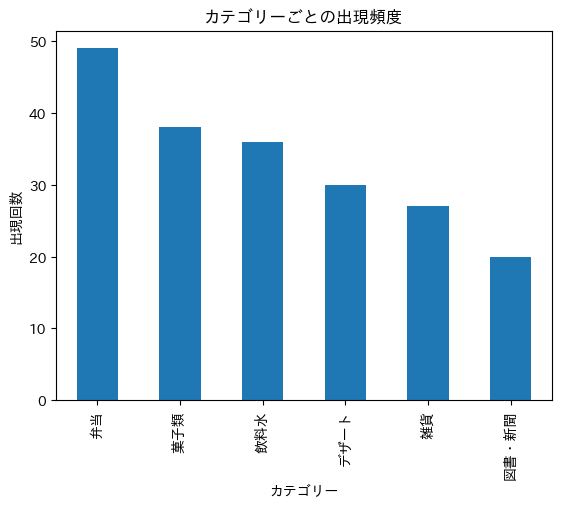

In [26]:
catgory_counts = df['カテゴリー'].value_counts()
catgory_counts.plot(kind='bar')
plt.title('カテゴリーごとの出現頻度')
plt.xlabel('カテゴリー')
plt.ylabel('出現回数')

plt.show()

In [30]:
order = df.groupby('商品番号')['注文数'].describe()

print(order)

          count       mean        std  min   25%   50%   75%   max
商品番号                                                              
1QJFO8QY   32.0  35.250000  18.461818  0.0  24.0  36.0  49.5  60.0
2HSTCDWM   20.0  29.400000  21.137146  0.0  12.0  27.0  48.0  60.0
48XMJXKO   10.0  21.600000  13.326665  0.0  13.5  21.0  30.0  42.0
8T7D5DQA   21.0  25.142857  18.260027  0.0  12.0  36.0  42.0  54.0
MESUDVWQ   17.0  43.764706  18.219253  0.0  42.0  48.0  54.0  60.0
QRMOGNUU   27.0  33.111111  16.588535  6.0  21.0  36.0  48.0  60.0
S6RE8W6X   20.0  33.300000  21.631118  0.0  12.0  39.0  54.0  60.0
X0ZE2ZMY   14.0  21.857143  21.901377  0.0   1.5  15.0  39.0  60.0
YY4HAAZR   17.0  31.764706  18.095336  0.0  18.0  30.0  42.0  60.0
Z4WOOIYV   22.0  26.727273  19.218498  0.0  12.0  24.0  42.0  60.0
